<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Database-Info" data-toc-modified-id="Database-Info-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Database Info</a></span></li><li><span><a href="#Histograms" data-toc-modified-id="Histograms-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Histograms</a></span></li><li><span><a href="#BoxPlots" data-toc-modified-id="BoxPlots-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>BoxPlots</a></span></li><li><span><a href="#Multicollinearity-of-Features" data-toc-modified-id="Multicollinearity-of-Features-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Multicollinearity of Features</a></span><ul class="toc-item"><li><span><a href="#Pairplot" data-toc-modified-id="Pairplot-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Pairplot</a></span></li><li><span><a href="#Heatmap" data-toc-modified-id="Heatmap-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Heatmap</a></span></li></ul></li></ul></div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('adult.csv')

# Database Info

In [3]:
df.shape

(48842, 15)

In [4]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [6]:
df.describe(include='all')

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
count,48842.000000,48842,4.884200e+04,48842,48842.000000,48842,48842,48842,48842,48842,48842.000000,48842.000000,48842.000000,48842,48842
unique,NaN,9,NaN,16,NaN,7,15,6,5,2,NaN,NaN,NaN,42,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,33906,NaN,15784,NaN,22379,6172,19716,41762,32650,NaN,NaN,NaN,43832,37155
mean,38.643585,NaN,1.896641e+05,NaN,10.078089,NaN,NaN,NaN,NaN,NaN,1079.067626,87.502314,40.422382,NaN,NaN
std,13.710510,NaN,1.056040e+05,NaN,2.570973,NaN,NaN,NaN,NaN,NaN,7452.019058,403.004552,12.391444,NaN,NaN
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.175505e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.781445e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,2.376420e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


In [7]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [8]:
df.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [9]:
df = df.replace('?',np.nan)
df.isnull().sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

In [10]:
print('workclass',df.workclass.unique(),df.workclass.nunique())
print('education',df.education.unique(),df.education.nunique())
print('marital-status',df['marital-status'].unique(),df['marital-status'].nunique())
print('occupation',df.occupation.unique(),df.occupation.nunique())
print('relationship',df.relationship.unique(),df.relationship.nunique())
print('race',df.race.unique(),df.race.nunique())
print('gender',df.gender.unique(),df.gender.nunique())
print('native-country',df['native-country'].unique(),df['native-country'].nunique())

workclass ['Private' 'Local-gov' nan 'Self-emp-not-inc' 'Federal-gov' 'State-gov'
 'Self-emp-inc' 'Without-pay' 'Never-worked'] 8
education ['11th' 'HS-grad' 'Assoc-acdm' 'Some-college' '10th' 'Prof-school'
 '7th-8th' 'Bachelors' 'Masters' 'Doctorate' '5th-6th' 'Assoc-voc' '9th'
 '12th' '1st-4th' 'Preschool'] 16
marital-status ['Never-married' 'Married-civ-spouse' 'Widowed' 'Divorced' 'Separated'
 'Married-spouse-absent' 'Married-AF-spouse'] 7
occupation ['Machine-op-inspct' 'Farming-fishing' 'Protective-serv' nan
 'Other-service' 'Prof-specialty' 'Craft-repair' 'Adm-clerical'
 'Exec-managerial' 'Tech-support' 'Sales' 'Priv-house-serv'
 'Transport-moving' 'Handlers-cleaners' 'Armed-Forces'] 14
relationship ['Own-child' 'Husband' 'Not-in-family' 'Unmarried' 'Wife' 'Other-relative'] 6
race ['Black' 'White' 'Asian-Pac-Islander' 'Other' 'Amer-Indian-Eskimo'] 5
gender ['Male' 'Female'] 2
native-country ['United-States' nan 'Peru' 'Guatemala' 'Mexico' 'Dominican-Republic'
 'Ireland' 'Germany

Import the cleaned dataset i.e data.csv  

In [11]:
data= pd.read_csv('data.csv')

# Histograms

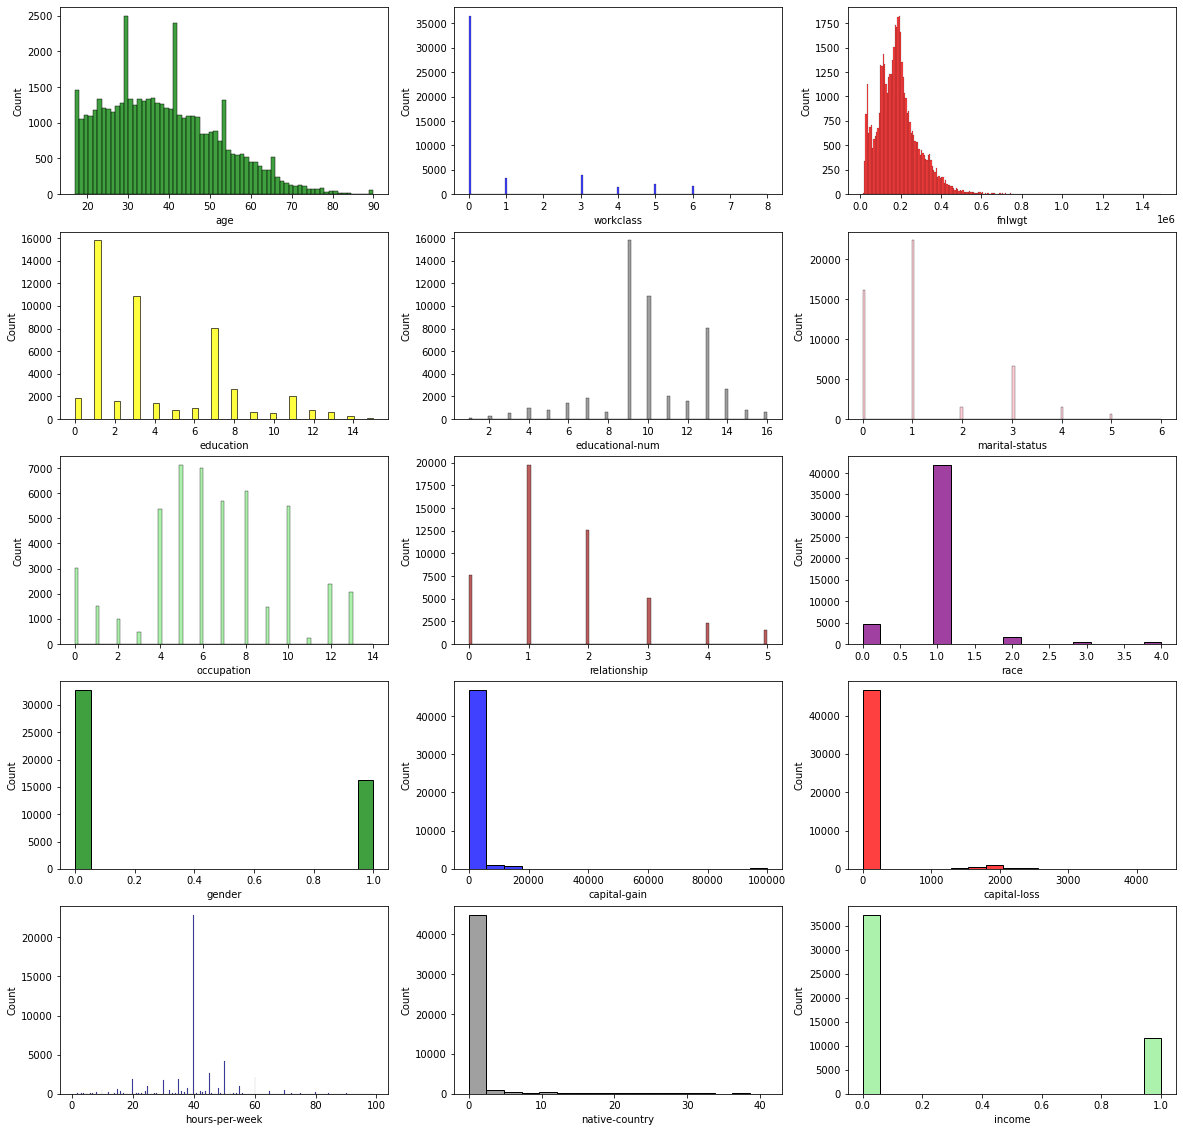

In [13]:
fig, axes = plt.subplots(5, 3, figsize=(20,20))
sns.histplot(data=data['age'], ax=axes[0, 0],color='green')
sns.histplot(data=data['workclass'], ax=axes[0, 1],color='Blue')
sns.histplot(data=data['fnlwgt'], ax=axes[0, 2],color='red')
sns.histplot(data=data['education'], ax=axes[1, 0],color='yellow')
sns.histplot(data=data['educational-num'], ax=axes[1, 1],color='gray')
sns.histplot(data=data['marital-status'], ax=axes[1, 2],color='pink')
sns.histplot(data=data['occupation'], ax=axes[2, 0],color='lightgreen')
sns.histplot(data=data['relationship'], ax=axes[2, 1],color='brown')
sns.histplot(data=data['race'], ax=axes[2, 2],color='purple')
sns.histplot(data=data['gender'], ax=axes[3, 0],color='green')
sns.histplot(data=data['capital-gain'], ax=axes[3, 1],color='Blue')
sns.histplot(data=data['capital-loss'], ax=axes[3, 2],color='red')
sns.histplot(data=data['hours-per-week'], ax=axes[4, 0],color='darkblue')
sns.histplot(data=data['native-country'], ax=axes[4, 1],color='gray')
sns.histplot(data=data['income'], ax=axes[4, 2],color='lightgreen')
plt.show()

# BoxPlots

<AxesSubplot:xlabel='income', ylabel='age'>

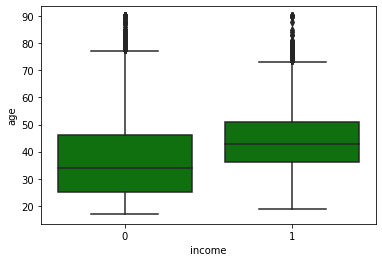

In [14]:
sns.boxp`lot(data=data,x='income',y='age',color='green')

<AxesSubplot:xlabel='income', ylabel='fnlwgt'>

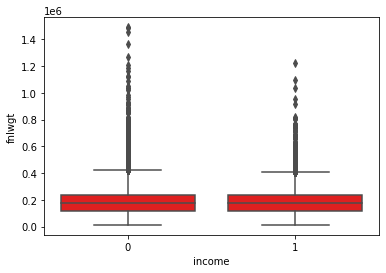

In [15]:
sns.boxplot(data=data,x='income', y='fnlwgt',color='red')

# Multicollinearity of Features

## Pairplot

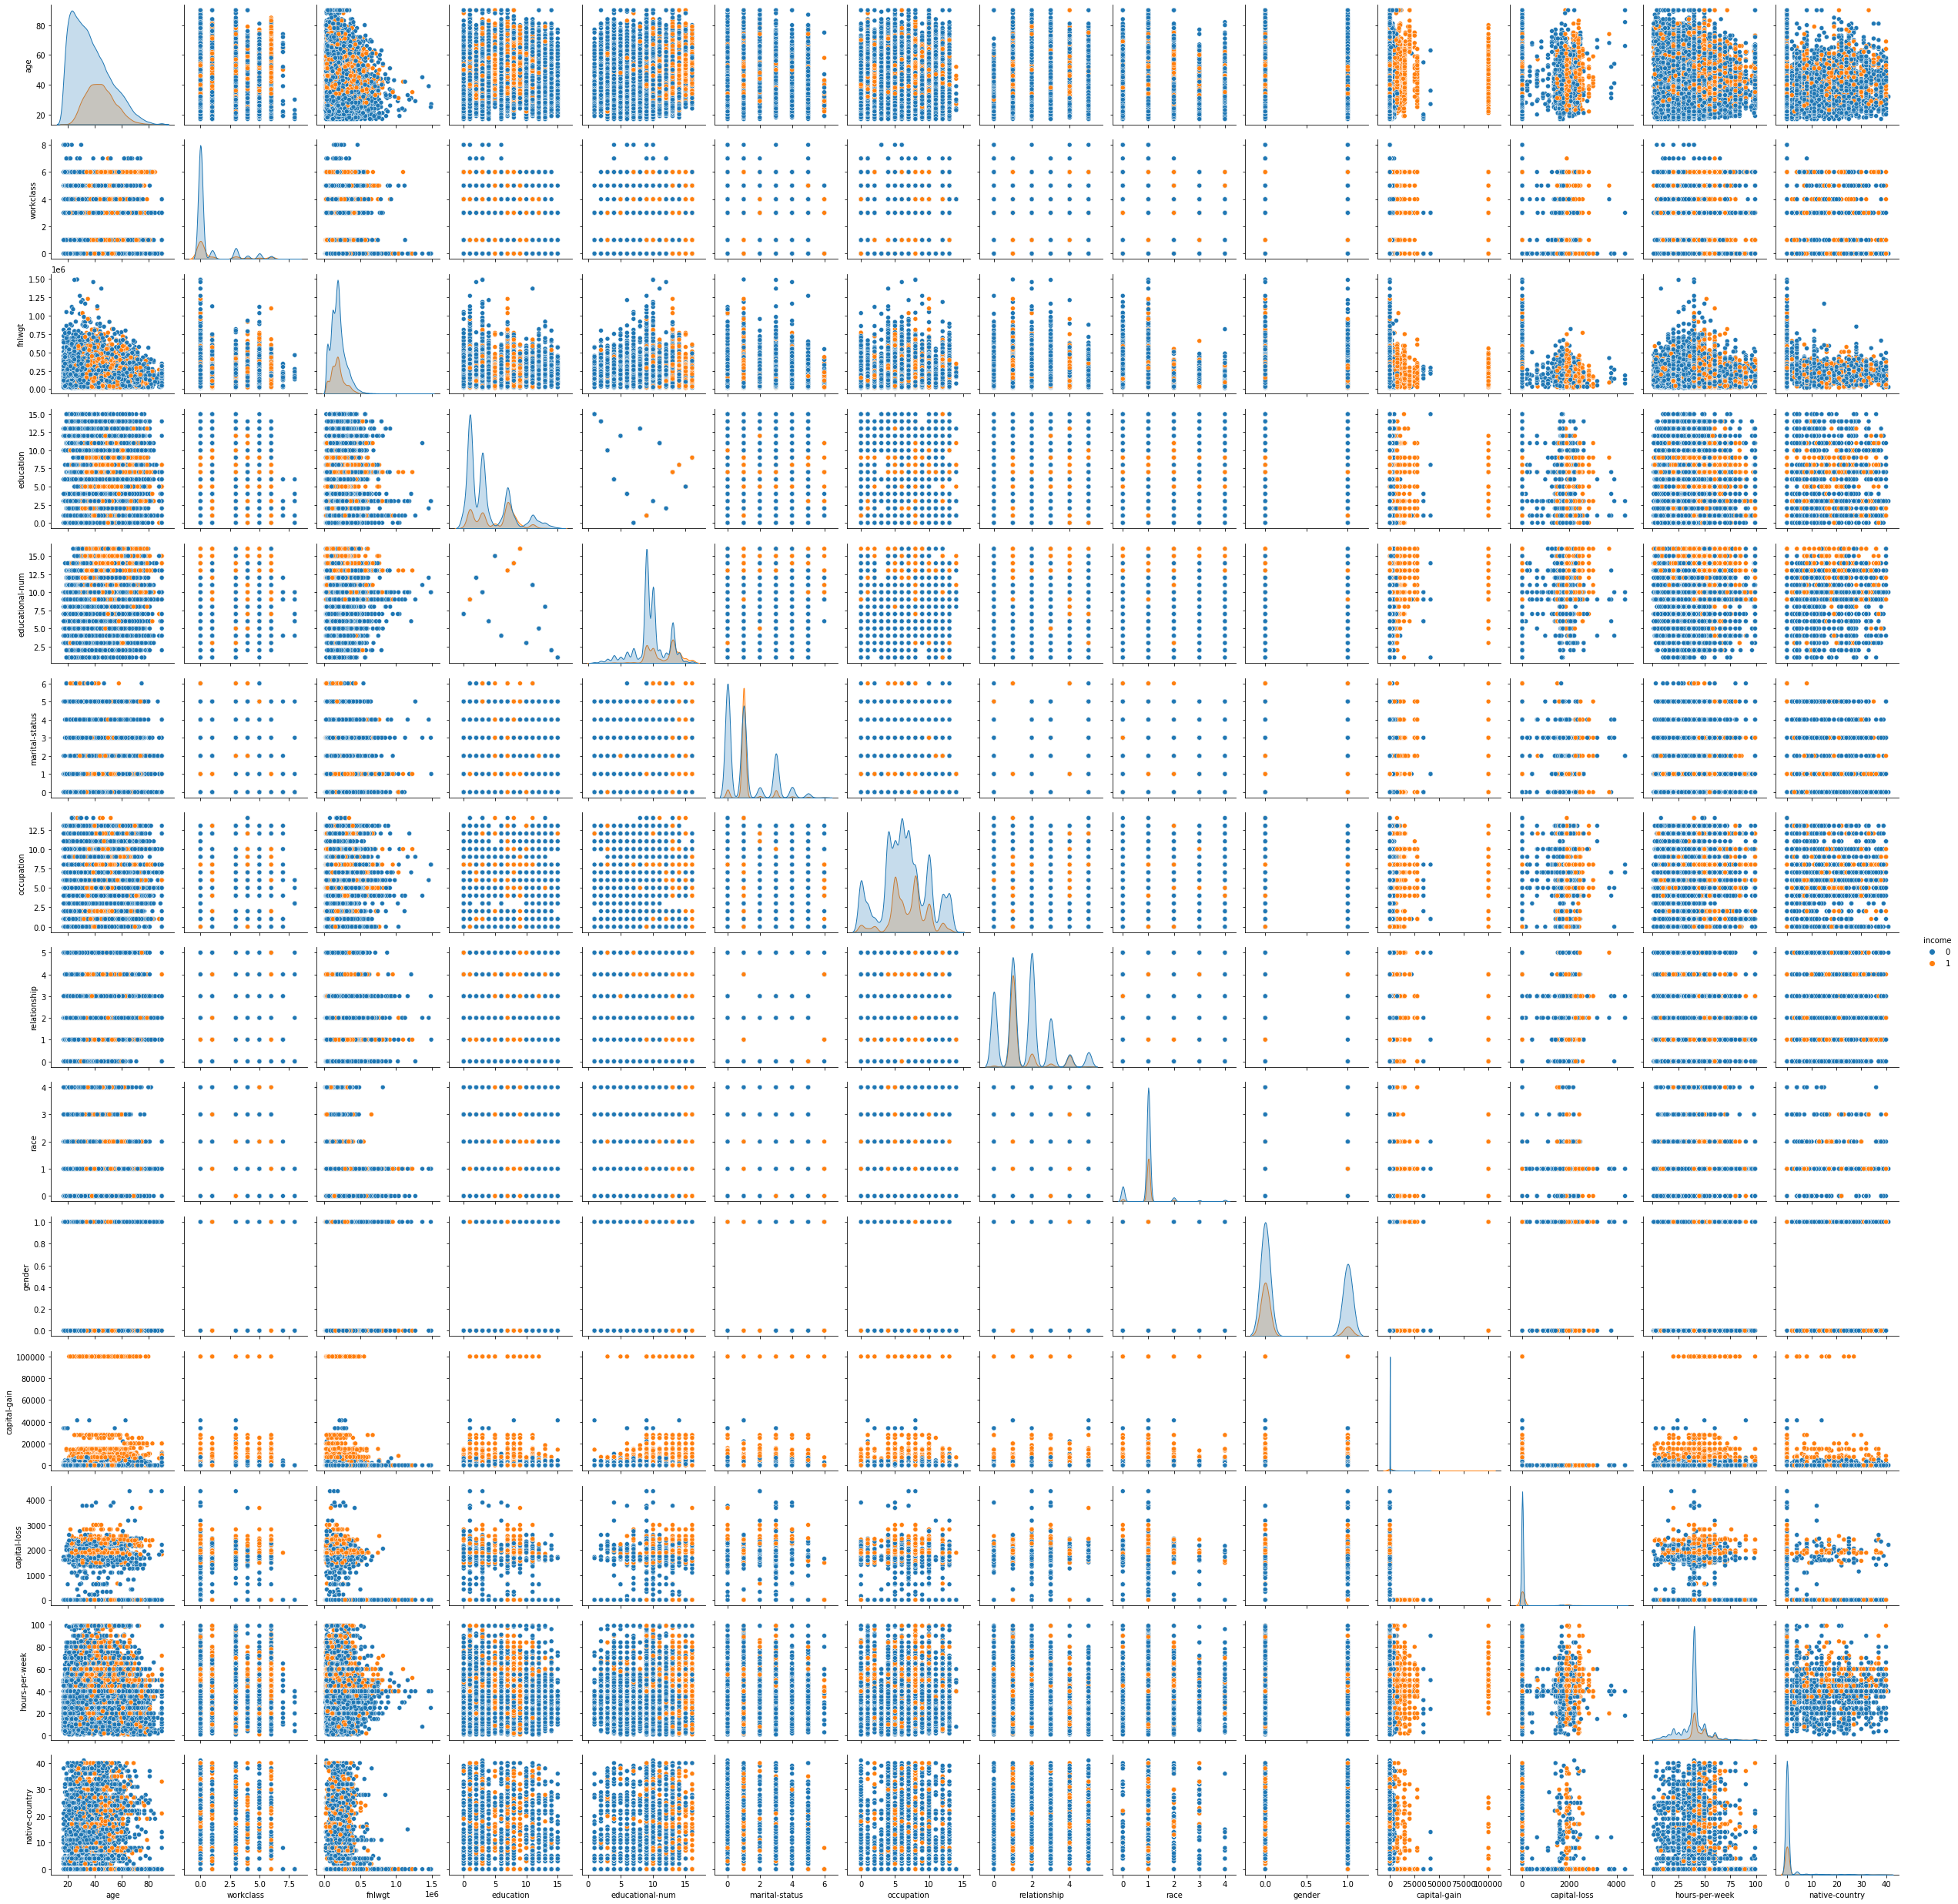

In [12]:
sns.pairplot(data,hue='income')

## Heatmap

In [9]:
data.corr()


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
age,1.000000,0.172244,-0.076628,0.083128,0.030940,0.340660,-0.018654,0.122638,-0.013759,-0.088120,0.077229,0.056944,0.071558,0.018856,0.230369
workclass,0.172244,1.000000,-0.044195,0.061321,0.158536,0.030179,-0.014098,-0.020978,0.016079,-0.087156,0.071971,0.035768,0.118163,-0.006395,0.140558
fnlwgt,-0.076628,-0.044195,1.000000,0.004889,-0.038761,-0.016426,0.017305,0.002615,-0.128775,-0.027739,-0.003706,-0.004366,-0.013519,0.020611,-0.006339
education,0.083128,0.061321,0.004889,1.000000,0.256100,-0.011891,-0.030187,0.020346,0.042265,-0.030555,0.056679,0.035468,0.057752,0.074038,0.160178
educational-num,0.030940,0.158536,-0.038761,0.256100,1.000000,-0.037273,0.052085,-0.010374,0.034786,-0.009328,0.125146,0.080972,0.143689,-0.023524,0.332613
marital-status,0.340660,0.030179,-0.016426,-0.011891,-0.037273,1.000000,-0.017864,0.284348,-0.015249,0.153760,0.008431,0.002681,0.070024,0.017588,-0.003602
occupation,-0.018654,-0.014098,0.017305,-0.030187,0.052085,-0.017864,1.000000,-0.032534,0.007174,-0.039618,0.009032,0.014926,0.038982,-0.028838,0.055749
relationship,0.122638,-0.020978,0.002615,0.020346,-0.010374,0.284348,-0.032534,1.000000,-0.020644,0.391131,-0.009970,-0.009780,-0.002686,0.054365,-0.060166
race,-0.013759,0.016079,-0.128775,0.042265,0.034786,-0.015249,0.007174,-0.020644,1.000000,-0.053702,0.011933,0.004471,0.021727,0.125341,0.032272
gender,-0.088120,-0.087156,-0.027739,-0.030555,-0.009328,0.153760,-0.039618,0.391131,-0.053702,1.000000,-0.047094,-0.045480,-0.228560,0.001594,-0.214628


<AxesSubplot:>

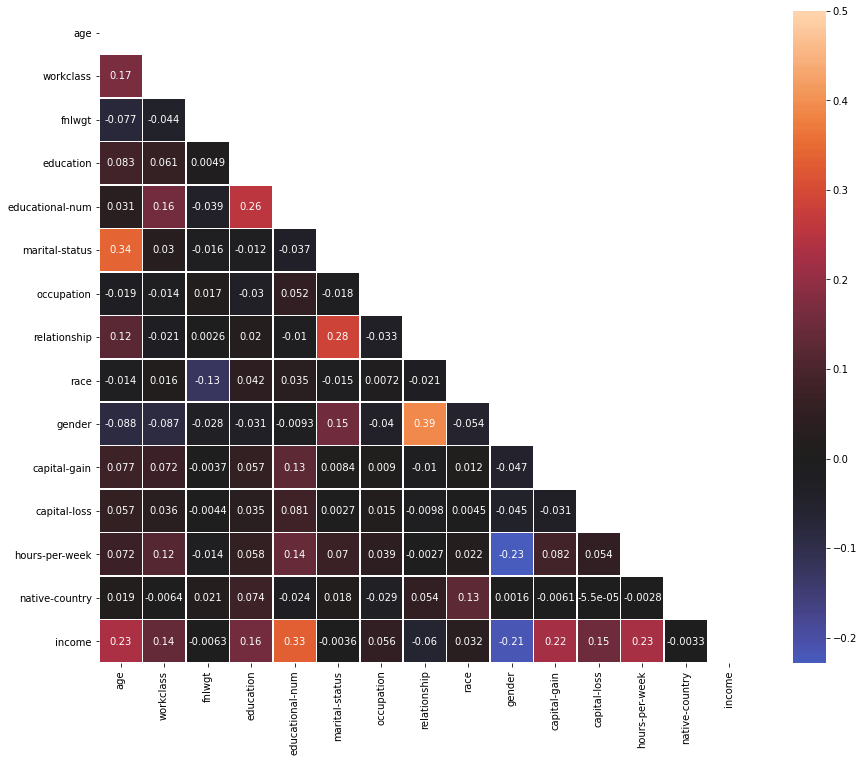

In [14]:
fig = plt.figure(figsize = (15,12))
mask = np.triu(np.ones_like(data.corr(), dtype=bool))
sns.heatmap(data.corr(), mask=mask, vmax=0.5, center=0, square=True, linewidths=.5, annot=True)